In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib notebook

### Solving equations

#### Solving for m

In [2]:
wd, t, m, c0 = sp.symbols('wd t m c0')

# Conservation of mass
d = t - m

# Chemical potentials
func = sp.exp(wd) -  (d * c0) / (m ** 2)

sp.pprint(sp.solve(func, m))
sp.solve(func, m)

⎡⎛         ___________________⎞        ⎛        ___________________⎞      ⎤
⎢⎜        ╱    ⎛          wd⎞ ⎟  -wd   ⎜       ╱    ⎛          wd⎞ ⎟  -wd ⎥
⎢⎝-c₀ + ╲╱  c₀⋅⎝c₀ + 4⋅t⋅ℯ  ⎠ ⎠⋅ℯ     -⎝c₀ + ╲╱  c₀⋅⎝c₀ + 4⋅t⋅ℯ  ⎠ ⎠⋅ℯ    ⎥
⎢───────────────────────────────────, ────────────────────────────────────⎥
⎣                 2                                    2                  ⎦


[(-c0 + sqrt(c0*(c0 + 4*t*exp(wd))))*exp(-wd)/2,
 -(c0 + sqrt(c0*(c0 + 4*t*exp(wd))))*exp(-wd)/2]

#### Solving for m / c0

No simpler

In [3]:
sp.simplify(((-c0 + sp.sqrt(c0*(c0 + 4*t*sp.exp(wd))))*sp.exp(-wd)/2) / c0)

(-c0 + sqrt(c0*(c0 + 4*t*exp(wd))))*exp(-wd)/(2*c0)

### Figs

In [4]:
def mon(t, wd, c0=1):
    return (-c0 + np.sqrt(c0*(c0 + 4*t*np.exp(wd))))*np.exp(-wd)/2

def dim(t, wd, c0=1):
    return t - (-c0 + np.sqrt(c0*(c0 + 4*t*np.exp(wd))))*np.exp(-wd)/2

#### Monomer vs dimer

<IPython.core.display.Javascript object>


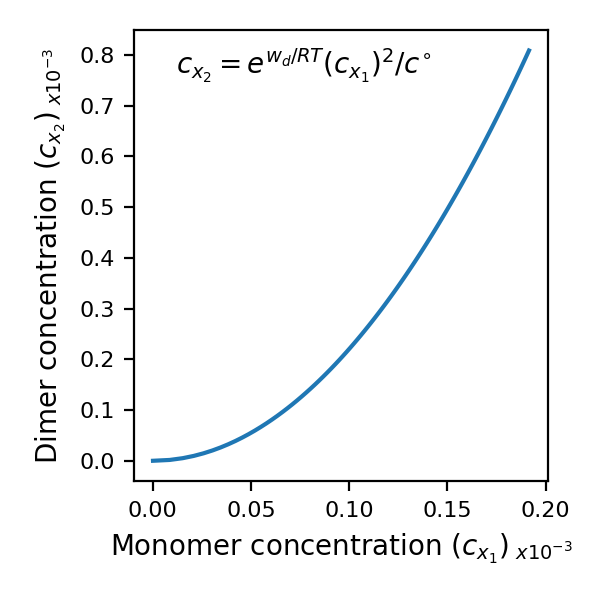

In [5]:
fig, ax = plt.subplots()
cs = np.linspace(1e-7, 1e-3, 100)
ax.plot(mon(cs, 10) / 1e-3, dim(cs, 10) / 1e-3)
ax.set_xlabel('Monomer concentration ' + r'$(c_{x_1}) \: _{x 10^{-3}}$')
ax.set_ylabel('Dimer concentration ' + r'$(c_{x_2}) \: _{x 10^{-3}}$')
ax.tick_params(axis='both', labelsize=8)
ax.text(0.1, 0.9, r'$c_{x_2} = e^{w_d/RT}(c_{x_1})^2 / c^{\circ}$', transform=ax.transAxes)

fig.set_size_inches(3, 3)
fig.tight_layout()
fig.savefig('Figs/dimer_only_mon_vs_dim.png', dpi=600, transparent=True)

### Fractions vs total

<IPython.core.display.Javascript object>


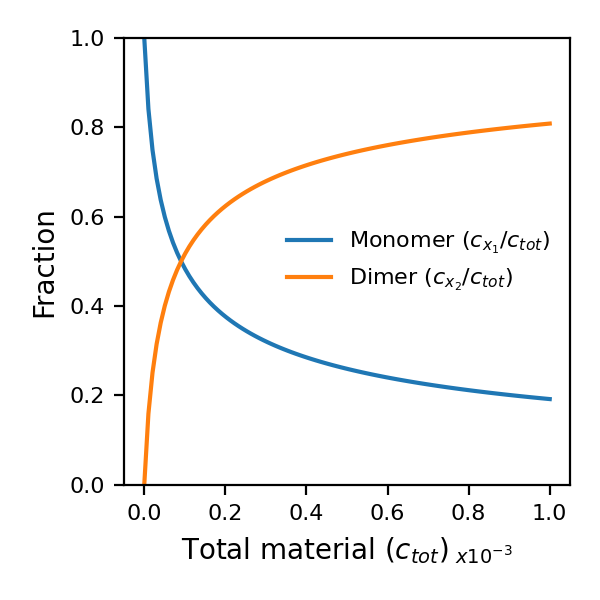

In [6]:
fig, ax = plt.subplots()
cs = np.linspace(1e-7, 1e-3, 100)
ax.plot(cs / 1e-3, mon(cs, 10) / cs, label='Monomer ' + r'$(c_{x_1} / c_{tot})$')
ax.plot(cs / 1e-3, dim(cs, 10) / cs, label='Dimer ' + r'$(c_{x_2} / c_{tot})$')

ax.tick_params(axis='both', labelsize=8)
ax.set_xlabel('Total material ' + r'$(c_{tot}) \: _{x 10^{-3}}$')
ax.set_ylabel('Fraction')
ax.set_ylim(0, 1)
ax.legend(frameon=False, fontsize=8)

fig.set_size_inches(3, 3)
fig.tight_layout()
fig.savefig('Figs/dimer_only_fractions_vs_dim.png', dpi=600, transparent=True)

### Reversing the calculation

In [12]:
wd, t, frac = sp.symbols('wd t frac')

# Chemical potentials
func = sp.exp(wd) -  (frac * t) / (((1 - frac) * t) ** 2)

sp.pprint(sp.solve(func, frac))
sp.solve(func, frac)

⎡⎛             _____________    ⎞       ⎛             _____________    ⎞     ⎤
⎢⎜     wd     ╱      wd         ⎟  -wd  ⎜     wd     ╱      wd         ⎟  -wd⎥
⎢⎝2⋅t⋅ℯ   - ╲╱  4⋅t⋅ℯ   + 1  + 1⎠⋅ℯ     ⎝2⋅t⋅ℯ   + ╲╱  4⋅t⋅ℯ   + 1  + 1⎠⋅ℯ   ⎥
⎢─────────────────────────────────────, ─────────────────────────────────────⎥
⎣                 2⋅t                                    2⋅t                 ⎦


[(2*t*exp(wd) - sqrt(4*t*exp(wd) + 1) + 1)*exp(-wd)/(2*t),
 (2*t*exp(wd) + sqrt(4*t*exp(wd) + 1) + 1)*exp(-wd)/(2*t)]

<IPython.core.display.Javascript object>


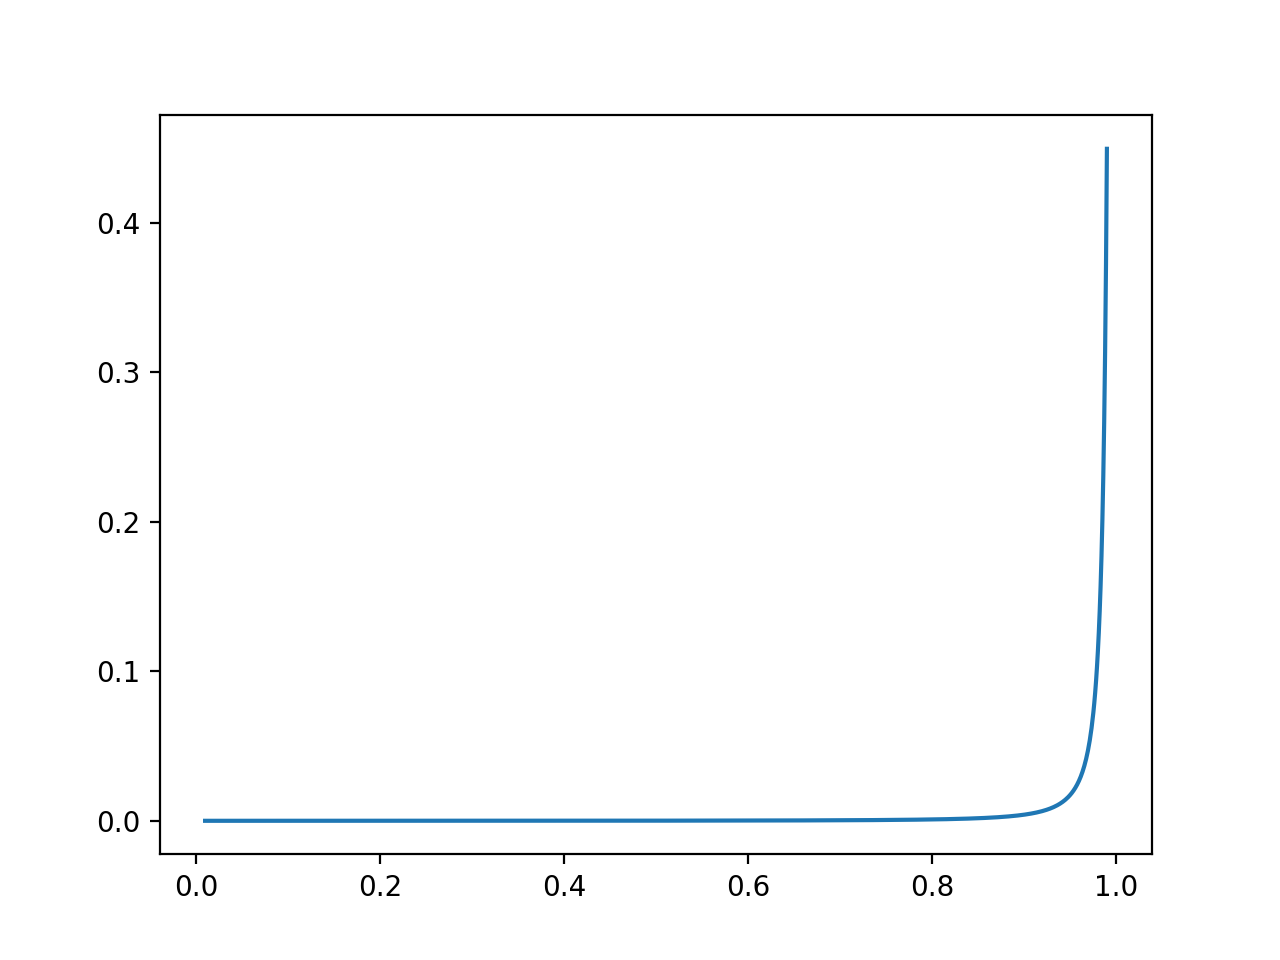

In [11]:
frac = np.linspace(0.01, 0.99, 1000)
wd = 10
conc = frac*np.exp(-wd)/(frac - 1)**2

fig, ax = plt.subplots()
ax.plot(frac, conc)

In [21]:
kon, k1, k2, mem, tot, phi = sp.symbols('kon, k1, k2, mem, tot, phi')

# Conservation of mass
cyt = tot - phi * mem

func = (kon * sp.sqrt(2 * k2 * mem + sp.sqrt(4 * k2 * mem + 1) + 1)) / k1 - mem / cyt

# sp.pprint(sp.solve(func, m))
sp.solve(func, mem)

KeyboardInterrupt: 

In [33]:
kon, k1, k2, mem, tot, phi = sp.symbols('kon, k1, k2, mem, tot, phi')

# Conservation of mass
cyt = tot - phi * mem

func = ((kon * sp.sqrt(2 * k2 * mem + sp.sqrt(4 * k2 * mem + 1) + 1)) / k1) - (mem / cyt)

sp.solve(func, mem)

KeyboardInterrupt: 

In [31]:
def func(kon, k1, k2, tot, phi):
    mem = sp.Symbol('mem')
    cyt = tot - phi * mem
    func1 = (kon * sp.sqrt(2 * k2 * mem + sp.sqrt(4 * k2 * mem + 1) + 1)) / k1 
    func2 = mem / cyt
    sp.nsolve([func1, func2], [mem, ], [0,])

In [32]:
func(kon=0.1, k1=0.01, k2=100, tot=1, phi=0.1)

ValueError: Could not find root within given tolerance. (64.2436967242484768928 > 2.16840434497100886801e-19)
Try another starting point or tweak arguments.

In [35]:
phi, m, alpha, tot = sp.symbols('phi m alpha tot')

func = m / (tot - phi * m) - alpha

sp.solve(func, m)

[alpha*tot/(alpha*phi + 1)]